In [1]:
# imports
import gymnasium as gym
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [2]:
# actions
LEFT, DOWN, RIGHT, UP = 0,1,2,3

# import the frozen lake gym environment
name = 'FrozenLake-v1'
env = gym.make(name, is_slippery=False) # warning: setting slippery=True results in very complex environment dynamics where the optimal solution does not make sense to humans!
# env.seed(742)
# env.action_space.seed(742)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Updated helper function to draw the frozen lake
def plot(env, V, policy, col_ramp=1, dpi=175, draw_vals=False):
    # Access unwrapped environment
    inner_env = env.unwrapped

    nrow = inner_env.nrow
    ncol = inner_env.ncol
    desc = inner_env.desc
    nS = env.observation_space.n

    plt.rcParams['figure.dpi'] = dpi
    plt.rcParams.update({'axes.edgecolor': (0.32, 0.36, 0.38)})
    plt.rcParams.update({'font.size': 4 if nrow == 8 else 7})
    plt.figure(figsize=(3, 3))

    plt.imshow(1 - V.reshape(nrow, ncol)**col_ramp, cmap='gray', interpolation='none', clim=(0, 1))
    ax = plt.gca()
    ax.set_xticks(np.arange(ncol) - .5)
    ax.set_yticks(np.arange(nrow) - .5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    for s in range(nS):
        x = s % nrow
        y = s // ncol
        a = policy[s]
        gray = np.array((0.32, 0.36, 0.38))
        tile = desc[y][x]

        if tile == b'G':
            plt.text(x - 0.45, y - 0.3, 'goal', color=(0.75, 0.22, 0.17), fontname='Sans', weight='bold')
            continue
        if a[0] > 0.0:
            plt.arrow(x, y, float(a[0]) * -0.84, 0.0, color=gray + 0.2 * (1 - V[s]), head_width=0.1, head_length=0.1)  # left
        if a[1] > 0.0:
            plt.arrow(x, y, 0.0, float(a[1]) * 0.84, color=gray + 0.2 * (1 - V[s]), head_width=0.1, head_length=0.1)   # down
        if a[2] > 0.0:
            plt.arrow(x, y, float(a[2]) * 0.84, 0.0, color=gray + 0.2 * (1 - V[s]), head_width=0.1, head_length=0.1)   # right
        if a[3] > 0.0:
            plt.arrow(x, y, 0.0, float(a[3]) * -0.84, color=gray + 0.2 * (1 - V[s]), head_width=0.1, head_length=0.1)  # up

        if tile == b'F':
            plt.text(x - 0.45, y - 0.3, 'ice', color=(gray * V[s]), fontname='Sans')
        elif tile == b'S':
            plt.text(x - 0.45, y - 0.3, 'start', color=(0.21, 0.51, 0.48), fontname='Sans', weight='bold')

        if draw_vals and V[s] > 0:
            vstr = '{0:.1e}'.format(V[s]) if nrow == 8 else '{0:.6f}'.format(V[s])
            plt.text(x - 0.45, y + 0.45, vstr, color=(gray * V[s]), fontname='Sans')

    plt.grid(color=(0.42, 0.46, 0.48), linestyle=':')
    ax.set_axisbelow(True)
    ax.tick_params(color=(0.42, 0.46, 0.48), which='both',
                   top=False, left=False, right=False, bottom=False)
    plt.show()


In [4]:
def random_epsilon_greedy_policy(Q, epsilon, state, nA):
    A = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    A[best_action] += (1.0 - epsilon)
    return A

# Fully random approach

In [5]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
n_s_a = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 100000
epsilon = 1
stats = 0.0

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    results_list = []
    result_sum = 0.0
    while not done:
        action = env.action_space.sample()
        new_state, reward, done, _, _ = env.step(action)
        results_list.append((state, action))
        result_sum += reward
        state = new_state
    
    for (state, action) in results_list:
        n_s_a[state, action] += 1.0
        alpha = 1.0 / n_s_a[state, action]
        Q[state, action] += alpha * (result_sum - Q[state, action])

    stats += result_sum
    if episode % 500 == 0 and episode is not 0:
        print(f"success: {stats/episode}, epsilon: {epsilon}")

print(f"success: {stats/episode}, epsilon: {epsilon}")

env.close()

<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\rentt\AppData\Local\Temp\ipykernel_26648\3501126198.py:25: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if episode % 500 == 0 and episode is not 0:


success: 0.012, epsilon: 1
success: 0.02, epsilon: 1
success: 0.016, epsilon: 1
success: 0.017, epsilon: 1
success: 0.0176, epsilon: 1
success: 0.018666666666666668, epsilon: 1
success: 0.018, epsilon: 1
success: 0.01725, epsilon: 1
success: 0.016888888888888887, epsilon: 1
success: 0.0166, epsilon: 1
success: 0.016363636363636365, epsilon: 1
success: 0.01633333333333333, epsilon: 1
success: 0.016, epsilon: 1
success: 0.015428571428571429, epsilon: 1
success: 0.015466666666666667, epsilon: 1
success: 0.015125, epsilon: 1
success: 0.015647058823529413, epsilon: 1
success: 0.015444444444444445, epsilon: 1
success: 0.015789473684210527, epsilon: 1
success: 0.0156, epsilon: 1
success: 0.015238095238095238, epsilon: 1
success: 0.015181818181818182, epsilon: 1
success: 0.015478260869565217, epsilon: 1
success: 0.015583333333333333, epsilon: 1
success: 0.01568, epsilon: 1
success: 0.015615384615384616, epsilon: 1
success: 0.015555555555555555, epsilon: 1
success: 0.0155, epsilon: 1
success: 0

# Epsilon-Greedy Exploration

In [6]:
# lets just sample the maximum action from Q to show the optimal policy
def pi_star_from_Q(Q):
    done = False
    pi_star = np.zeros([env.observation_space.n, env.action_space.n])
    state, _ = env.reset() # start in top-left, = 0
    while not done:
        action = np.argmax(Q[state, :])
        pi_star[state,action] = 1
        state, reward, done, _, _ = env.step(action)
    return pi_star

<>:28: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:28: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\rentt\AppData\Local\Temp\ipykernel_26648\1839504525.py:28: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if episode % 50 == 0 and episode is not 0:


success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
s

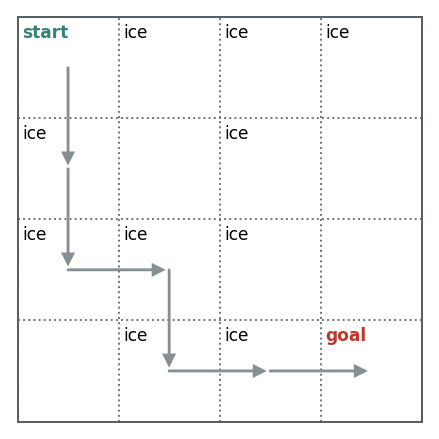

In [7]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
n_s_a = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 5000
epsilon = .3
stats = 0.0

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    results_list = []
    result_sum = 0.0
    while not done:
        if np.random.rand() > epsilon:
            action = np.argmax(Q[state, :])
        else:
            action = env.action_space.sample()
        new_state, reward, done, _, _ = env.step(action)
        results_list.append((state, action))
        result_sum += reward
        state = new_state
    
    for (state, action) in results_list:
        n_s_a[state, action] += 1.0
        alpha = 1.0 / n_s_a[state, action]
        Q[state, action] += alpha * (result_sum - Q[state, action])

    stats += result_sum
    if episode % 50 == 0 and episode is not 0:
        print(f"success: {stats/episode}, epsilon: {epsilon}")

print(f"success: {stats/episode}, epsilon: {epsilon}")

env.close()

if (stats/episode) > 0: 
    plot(env, np.zeros_like(Q[:,0]), pi_star_from_Q(Q))
else: 
    print('No solution Found')